In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import datetime
import re
from nltk.corpus import stopwords
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

conn = sqlite3.connect(r"../../diplom.db")
cur = conn.cursor()

In [2]:
corpus = [text[0].split() for text in cur.execute("""select CLEAN_TEXT from KOMMERSANT WHERE DEMOCRACY_COUNT>0;""").fetchall()]
graph = [i[0] for text in corpus for i in nltk.bigrams(text) if i[1] == "демократия"]
c = Counter(graph)
adjusting = pd.DataFrame(c.most_common()).rename(columns={0: "Слово", 1: "Количество"})
adjusting["Часть"] = [i[1] for i in nltk.pos_tag(adjusting["Слово"], lang="rus")]
adj = adjusting[adjusting["Часть"].isin(["A=m", "A-PRO=m"])].reset_index(drop=True)
s = adj["Количество"].sum()
adj["Процент"] = round(adj["Количество"]/s*100, 2)

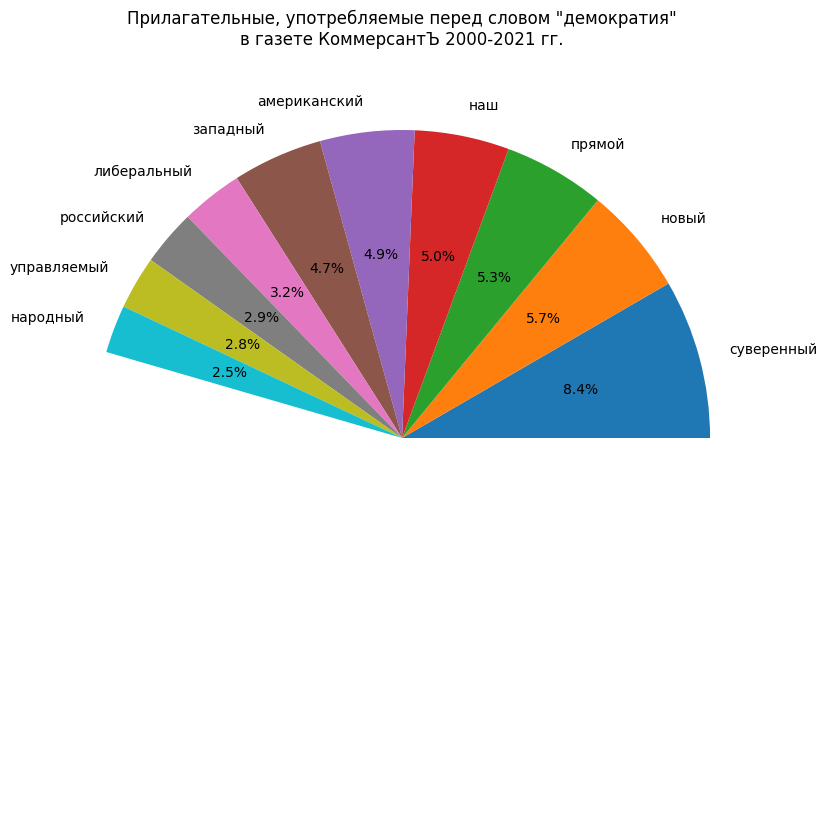

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10, forward=True)
rus = adj[["Слово", "Процент"]].head(10)
rus.loc[10, "Слово"] = "Ост."
rus.loc[10, "Процент"] = adj.loc[10:, "Процент"].sum()
wedge, text, procent = ax.pie(rus["Процент"], labels=rus["Слово"], autopct='%1.1f%%')
wedge[10].set_visible(False)
text[10].set_visible(False)
procent[10].set_visible(False)
ax.set_title('Прилагательные, употребляемые перед словом "демократия"\nв газете КоммерсантЪ 2000-2021 гг.')
fig.savefig("kommersant_adj_ru.png")

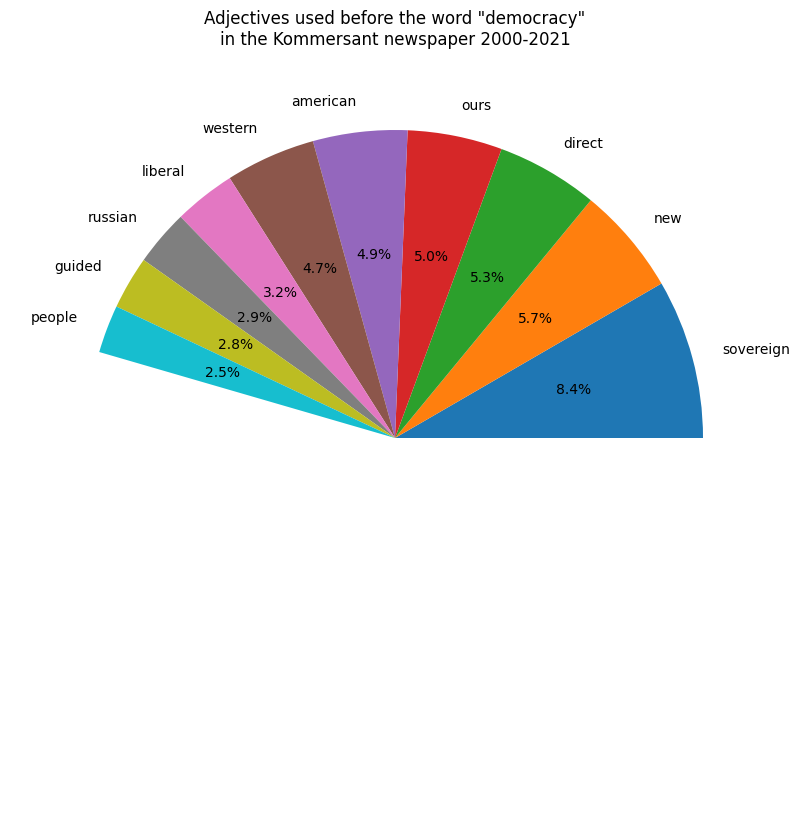

In [5]:
eng = rus.copy()
eng['Word'] = ['sovereign', 'new', 'direct', 'ours', 'american', 'western', 'liberal', 'russian', 'guided', 'people', 'rest']
fig, ax = plt.subplots()
fig.set_size_inches(10, 10, forward=True)
wedge, text, procent = ax.pie(rus["Процент"], labels=eng["Word"], autopct='%1.1f%%')
wedge[10].set_visible(False)
text[10].set_visible(False)
procent[10].set_visible(False)
ax.set_title('Adjectives used before the word "democracy"\nin the Kommersant newspaper 2000-2021')
fig.savefig("kommersant_adj_en.png")

In [5]:
%%time
corpus = [text[0].split() for text in cur.execute("""select CLEAN_TEXT from KOMMERSANT""").fetchall()]

CPU times: user 2min 7s, sys: 3min 27s, total: 5min 34s
Wall time: 1h 53min


In [6]:
%%time
model = Word2Vec(corpus, 
                 vector_size=1024,      # embedding vector size
                 min_count=2,
                 window=5)

CPU times: user 2h 53min 36s, sys: 27min 4s, total: 3h 20min 40s
Wall time: 1h 29min 38s


In [7]:
model.save("kommersant.model")
model.wv.save("kommersant.wordvectors")
model.wv.most_similar('демократия')

[('демократический', 0.5648719668388367),
 ('социализм', 0.5150695443153381),
 ('либерализм', 0.5121538639068604),
 ('авторитаризм', 0.48787805438041687),
 ('многопартийность', 0.48612335324287415),
 ('народовластие', 0.4777396023273468),
 ('государственность', 0.47409161925315857),
 ('демократизация', 0.4695815443992615),
 ('диктатура', 0.46844786405563354),
 ('капитализм', 0.4536902606487274)]

In [8]:
conn.close()

In [5]:
corpus = [text[0] for text in cur.execute("""select CLEAN_TEXT from NG WHERE DEMOCRACY_COUNT > 0;""").fetchall()]

In [4]:
len(corpus)

2067

In [3]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


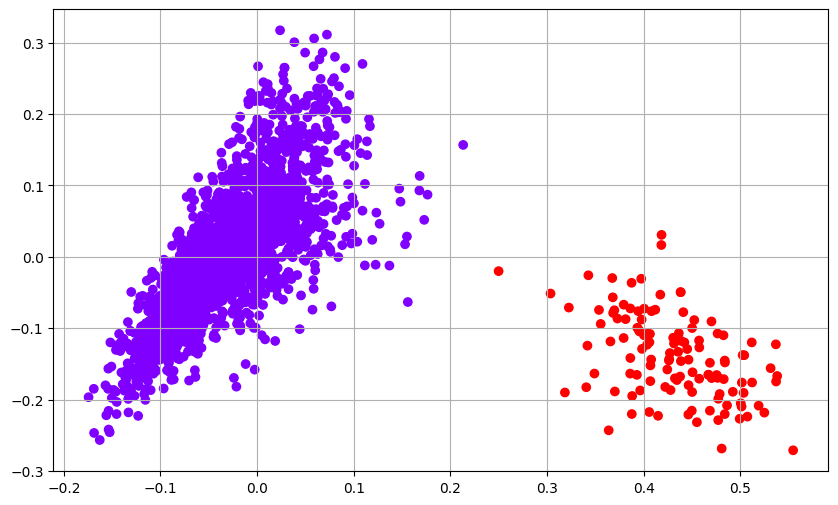

In [72]:
corpus = [text[0] for text in cur.execute("""select CLEAN_TEXT from NG WHERE DEMOCRACY_COUNT > 0;""").fetchall()]
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5
)
X_tfidf = vectorizer.fit_transform(corpus)
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(X_tfidf.toarray()) 
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_data)
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='black', marker='X', label='Centroids')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


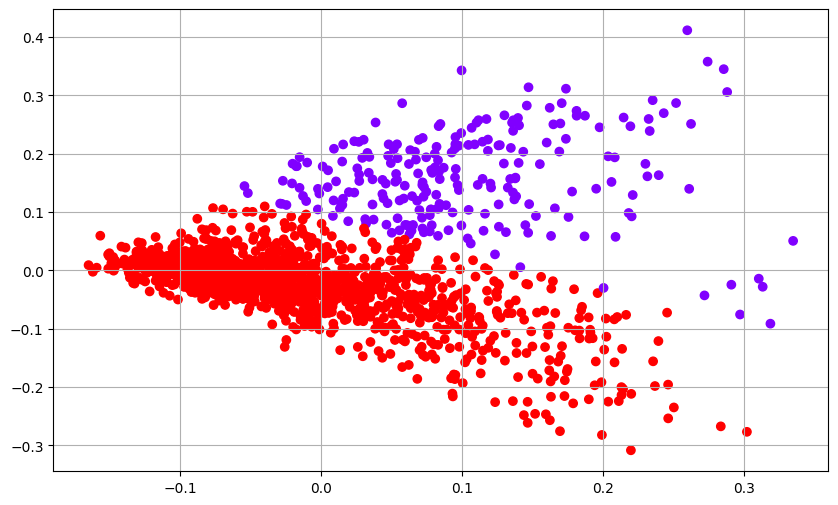

In [77]:
corpus = [text[0] for text in cur.execute("""select CLEAN_TEXT from VZGLYAD WHERE DEMOCRACY_COUNT > 0;""").fetchall()]
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5
)
X_tfidf = vectorizer.fit_transform(corpus)
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(X_tfidf.toarray()) 
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_data)
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='black', marker='X', label='Centroids')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


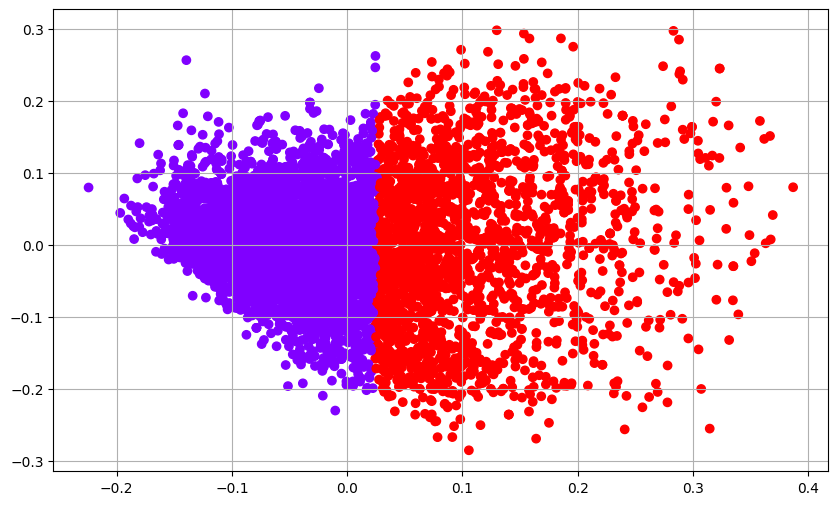

In [78]:
corpus = [text[0] for text in cur.execute("""select CLEAN_TEXT from ZAVTRA WHERE DEMOCRACY_COUNT > 0;""").fetchall()]
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5
)
X_tfidf = vectorizer.fit_transform(corpus)
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(X_tfidf.toarray()) 
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_data)
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='black', marker='X', label='Centroids')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


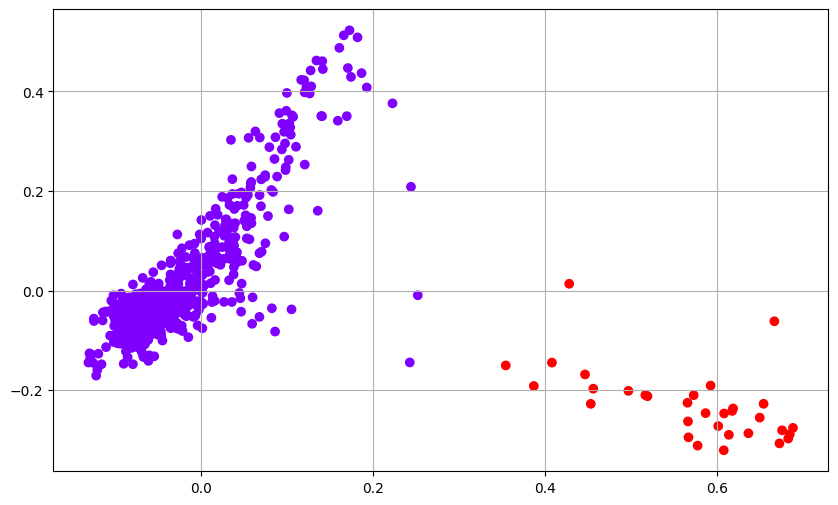

In [79]:
corpus = [text[0] for text in cur.execute("""select CLEAN_TEXT from IZVESTIA WHERE DEMOCRACY_COUNT > 0;""").fetchall()]
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5
)
X_tfidf = vectorizer.fit_transform(corpus)
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(X_tfidf.toarray()) 
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_data)
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='black', marker='X', label='Centroids')
plt.grid(True)
plt.show()

In [ ]:
corpus = [text[0] for text in cur.execute("""select CLEAN_TEXT from KOMMERSANT WHERE DEMOCRACY_COUNT > 0;""").fetchall()]
vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=0.2
)
X_tfidf = vectorizer.fit_transform(corpus)
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(X_tfidf.toarray()) 
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(reduced_data)
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='black', marker='X', label='Centroids')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


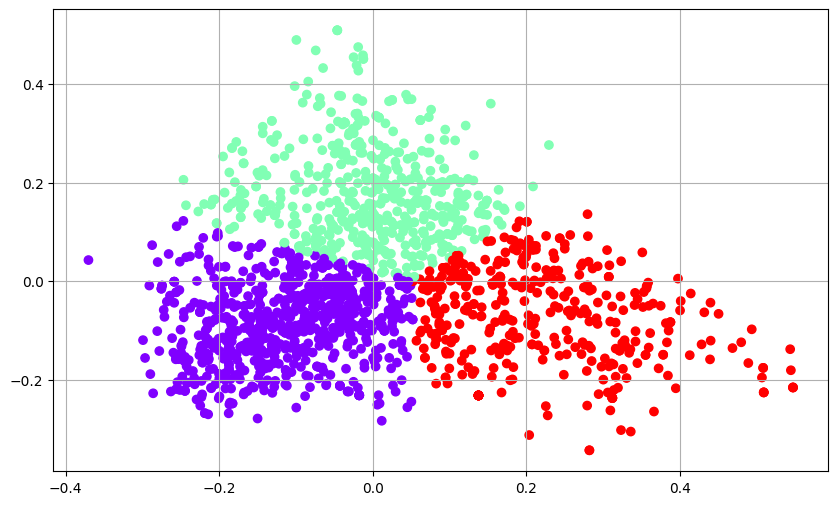

In [70]:
corpus = [text[0] for text in cur.execute("""select CLEAN_TEXT from VEDOMOSTI WHERE DEMOCRACY_COUNT > 0;""").fetchall()]
vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=0.1
)
X_tfidf = vectorizer.fit_transform(corpus)
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(X_tfidf.toarray()) 
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='black', marker='X', label='Centroids')
plt.grid(True)
plt.show()

In [1]:
vectorizer = TfidfVectorizer(
    max_df=0.25,
    min_df=3,
    # max_features=100,
    ngram_range=(1,3)
)
X_tfidf = vectorizer.fit_transform(corpus)
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(X_tfidf.toarray()) 
# kmeans = KMeans(n_clusters=2, random_state=42)
# clusters = kmeans.fit_predict(reduced_data)
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='black', marker='X', label='Centroids')
plt.grid(True)
plt.show()

NameError: name 'TfidfVectorizer' is not defined

In [69]:
corpus = [text[0].split() for text in cur.execute("""select CLEAN_TEXT from KOMMERSANT WHERE DEMOCRACY_COUNT > 0;""").fetchall()]

In [70]:
dictionary = corpora.Dictionary(corpus)
doc_corpus = [dictionary.doc2bow(text) for text in corpus]


In [71]:
lda_model = LdaModel(corpus=doc_corpus, id2word=dictionary, num_topics=7, update_every=1, chunksize=100000, passes=100, alpha='auto', eta='auto')

In [75]:
lda_model.show_topics()

[(0,
  '0.017*"это" + 0.011*"который" + 0.008*"человек" + 0.007*"-" + 0.006*"свой" + 0.006*"год" + 0.005*"говорить" + 0.005*"россия" + 0.005*"такой" + 0.005*"этот"'),
 (1,
  '0.013*"выборы" + 0.013*"партия" + 0.009*"который" + 0.009*"президент" + 0.008*"россия" + 0.007*"год" + 0.007*"власть" + 0.006*"это" + 0.006*"-" + 0.005*"господин"'),
 (2,
  '0.016*"год" + 0.009*"-" + 0.008*"страна" + 0.007*"который" + 0.004*"новый" + 0.004*"становиться" + 0.004*"это" + 0.003*"россия" + 0.003*"экономика" + 0.003*"экономический"'),
 (3,
  '0.051*"фото" + 0.022*"коммерсант" + 0.021*"год" + 0.017*"купить" + 0.010*"борис" + 0.010*"немцов" + 0.007*"александр" + 0.006*"акция" + 0.005*"президент" + 0.005*"дмитрий"'),
 (4,
  '0.023*"-" + 0.019*"год" + 0.015*"фото" + 0.007*"reuters" + 0.006*"00" + 0.006*"20" + 0.005*"президент" + 0.005*"страна" + 0.005*"10" + 0.005*"15"'),
 (5,
  '0.015*"сша" + 0.011*"президент" + 0.009*"россия" + 0.008*"год" + 0.008*"который" + 0.008*"страна" + 0.006*"фото" + 0.006*"россий

In [74]:
# pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_corpus, dictionary)
vis

TypeError: drop() takes from 1 to 2 positional arguments but 3 were given

In [66]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
# tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(corpus)]

In [6]:
model = Doc2Vec(vector_size=20, min_count=2, epochs=50)
model.build_vocab(tagged_data)
model.train(tagged_data,
            total_examples=model.corpus_count,
            epochs=model.epochs)

In [41]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Тема {idx + 1}: {topic}")

Тема 1: 0.028*"фото" + 0.023*"сша" + 0.017*"президент" + 0.017*"reuters" + 0.015*"трамп" + 0.012*"год" + 0.010*"дональд" + 0.007*"американский" + 0.007*"ap" + 0.006*"свой"
Тема 2: 0.021*"год" + 0.013*"-" + 0.007*"который" + 0.005*"становиться" + 0.004*"свой" + 0.004*"страна" + 0.004*"первый" + 0.003*"время" + 0.003*"новый" + 0.003*"советский"
Тема 3: 0.060*"фото" + 0.029*"коммерсант" + 0.026*"год" + 0.023*"купить" + 0.014*"борис" + 0.013*"немцов" + 0.007*"александр" + 0.007*"дмитрий" + 0.005*"россия" + 0.005*"владимир"
Тема 4: 0.012*"партия" + 0.011*"выборы" + 0.009*"год" + 0.009*"который" + 0.007*"россия" + 0.007*"президент" + 0.007*"власть" + 0.006*"-" + 0.005*"это" + 0.005*"депутат"
Тема 5: 0.019*"это" + 0.011*"который" + 0.009*"человек" + 0.008*"-" + 0.006*"свой" + 0.006*"говорить" + 0.005*"такой" + 0.005*"год" + 0.005*"наш" + 0.005*"этот"
Тема 6: 0.020*"-" + 0.010*"россия" + 0.009*"рождаться" + 0.008*"оканчивать" + 0.008*"наука" + 0.008*"работать" + 0.008*"депутат" + 0.006*"инстит

In [3]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
dataset = [text[0] for text in cur.execute("""select CLEAN_TEXT from KOMMERSANT WHERE DEMOCRACY_COUNT > 0;""").fetchall()]

In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset)

In [19]:
from sklearn.decomposition import PCA

# reduce the dimensionality of the data using PCA 
pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(X.toarray()) 

In [61]:
len(vectorizer.get_feature_names_out())

114406

In [62]:
!python3 -m pip install pyLDAvis

     |████████████████████████████████| 2.6 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 17.4 MB/s ta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [43]:
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


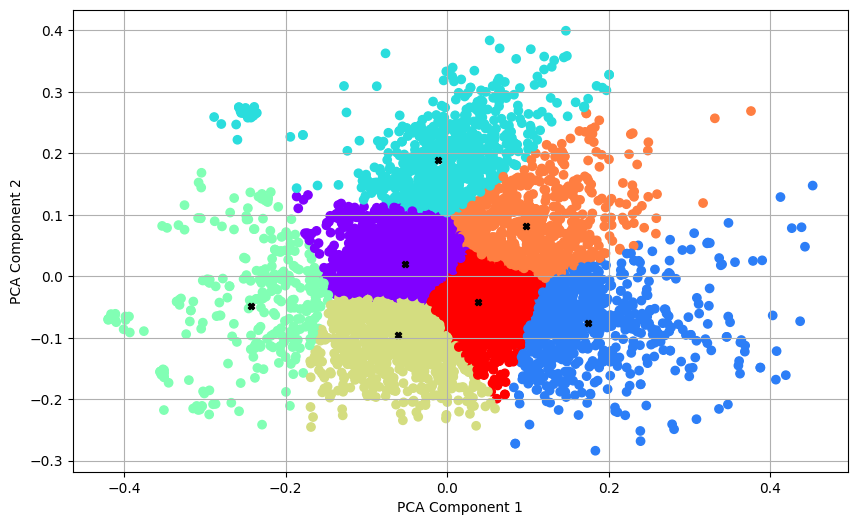

In [44]:
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(reduced_tfidf)
 
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='black', marker='X', label='Centroids')
plt.grid(True)
plt.show()

In [76]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

NameError: name 'lsa' is not defined

In [45]:
kmeans.cluster_centers_

array([[-0.05255676,  0.01911742],
       [ 0.17472303, -0.07663992],
       [-0.01178963,  0.18965542],
       [-0.24345721, -0.04770244],
       [-0.06145611, -0.09480928],
       [ 0.09798308,  0.08169994],
       [ 0.0379602 , -0.04256792]])

In [48]:
labels = kmeans.labels_.tolist()

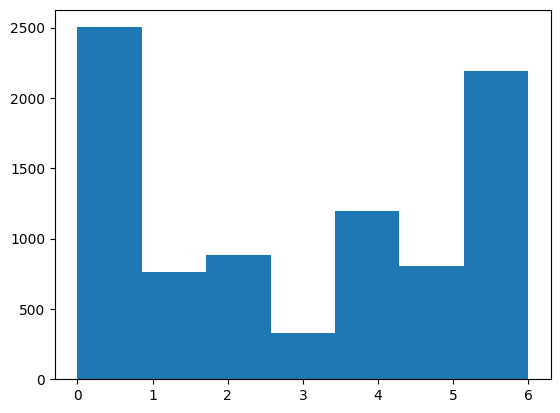

In [51]:
plt.hist(labels, bins=7)
plt.show()

In [31]:
def get_top_terms_by_summing_tfidf(cluster_id, matrix, vectorizer, n_terms=5):
    """Get the top terms for a given cluster by summing the TF-IDF scores."""
    # Filter the matrix to only include documents from the given cluster
    cluster_matrix = matrix[clusters == cluster_id]
    # Sum the TF-IDF scores
    summed_tfidf = cluster_matrix.sum(axis=0)
    # Convert to numpy array for easier indexing
    summed_tfidf = summed_tfidf
    # Get the top term indices
    top_term_indices = summed_tfidf.argsort()[-n_terms:][::-1]
    # Convert indices to actual terms
    top_terms = [vectorizer.get_feature_names_out()[index] for index in top_term_indices]
    return top_terms
 
# Extract top terms for each cluster using the new method
cluster_top_terms_by_sum = {cluster_id: get_top_terms_by_summing_tfidf(cluster_id, reduced_data, vectorizer) for cluster_id in range(3)}
 
cluster_top_terms_by_sum

{0: ['000', '00'], 1: ['00', '000'], 2: ['000', '00']}

In [27]:
clusters

array([1, 2, 2, ..., 2, 1, 2], dtype=int32)

In [24]:
kmeans.labels_

array([1, 2, 2, ..., 2, 1, 2], dtype=int32)

In [13]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1.0)

In [34]:
res = dbscan.fit_predict(X)

In [15]:
cluster_labels = dbscan.labels_
coords = X.toarray()

In [35]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', cluster_labels))
plt.scatter(res[:, 0], res[:, 1], c=colors, marker="o", picker=True)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [6]:
# Define the number of clusters
k = 2

# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

# Predict the clusters for each document
y_pred = km.predict(X)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
km.labels_

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [34]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, update_every=1,
                                      chunksize =100000, passes=100, alpha='auto', eta='auto')

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [24]:
model.wv.key_to_index

{'год': 0,
 '-': 1,
 'который': 2,
 'это': 3,
 'фото': 4,
 'россия': 5,
 'страна': 6,
 'президент': 7,
 'человек': 8,
 'свой': 9,
 'становиться': 10,
 'власть': 11,
 'партия': 12,
 'выборы': 13,
 'сша': 14,
 'время': 15,
 'новый': 16,
 'такой': 17,
 'этот': 18,
 'один': 19,
 'российский': 20,
 'первый': 21,
 'говорить': 22,
 'коммерсант': 23,
 'политический': 24,
 'дело': 25,
 'самый': 26,
 'вопрос': 27,
 'глава': 28,
 'наш': 29,
 'демократия': 30,
 'другой': 31,
 'господин': 32,
 'тот': 33,
 'мочь': 34,
 'путин': 35,
 'заявлять': 36,
 'владимир': 37,
 'ъ': 38,
 'должный': 39,
 'отношение': 40,
 'купить': 41,
 'государство': 42,
 'москва': 43,
 'весь': 44,
 'право': 45,
 'сказать': 46,
 'считать': 47,
 'правительство': 48,
 'очень': 49,
 'reuters': 50,
 'быть': 51,
 'также': 52,
 'получать': 53,
 'политика': 54,
 'день': 55,
 'мир': 56,
 'слово': 57,
 'лидер': 58,
 'принимать': 59,
 'депутат': 60,
 'против': 61,
 'решение': 62,
 'украина': 63,
 'работать': 64,
 'иметь': 65,
 'член': 66

In [19]:
doc_tags = list(model.docvecs.doctags.keys())
X = model[doc_tags]

/var/folders/g4/mpm4njl93p547kbhxbvqlm480000gn/T/ipykernel_5131/2687738132.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  doc_tags = list(model.docvecs.doctags.keys())


AttributeError: 'KeyedVectors' object has no attribute 'doctags'

In [ ]:
model.tag

In [7]:
document_vectors = [model.infer_vector(doc) for doc in corpus]
 
# #  print the document vectors
# for i, doc in enumerate(data):
#     print("Document", i+1, ":", doc)
#     print("Vector:", document_vectors[i])
#     print()

In [ ]:
# Creating and fitting the tsne model to the document embeddings
tsne_model = TSNE(n_jobs=4,
                  early_exaggeration=4,
                  n_components=2,
                  verbose=1,
                  random_state=2018,
                  n_iter=300)
tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors_docs)

# Putting the tsne information into sq
tsne_d2v_df = pd.DataFrame(data=tsne_d2v, columns=["x", "y"])
# tsne_tfidf_df.columns = ["x", "y"]
tsne_d2v_df["qid"] = train_rebal["qid"].values
tsne_d2v_df["question_text"] = train_rebal["question_text"].values
tsne_d2v_df["target"] = train_rebal["target"].values

In [16]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tf_idf_vec = TfidfVectorizer(min_df=3,
                             max_features = 60_000, #100_000,
                             analyzer="word",
                             ngram_range=(1,3), # (1,6)
                             stop_words="english")
tf_idf = tf_idf_vec.fit_transform(list(train_rebal["question_text"].map(lambda tokens: " ".join(tokens))))

NameError: name 'train_rebal' is not defined

In [18]:
!python3 -m pip install bokeh

     |████████████████████████████████| 8.3 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 642 kB/s  eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=2018)
svd_tfidf = svd.fit_transform(tf_idf)

NameError: name 'tf_idf' is not defined

In [ ]:
tsne_model = TSNE(n_jobs=4,
                  early_exaggeration=4, # Trying out exaggeration trick
                  n_components=2,
                  verbose=1,
                  random_state=2018,
                  n_iter=500)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

In [8]:
for i, doc in enumerate(corpus):
    print("Document", i+1, ":", doc)
    print("Vector:", document_vectors[i])
    print()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [9]:
document_vectors

[array([-3.7686727 , -2.8960361 ,  6.4360065 , -5.4748993 , -0.98409694,
         1.2887542 , -4.5556808 , -8.064399  , -0.3301931 , -4.3070407 ,
         0.23335692, -6.301858  ,  1.039322  , -0.23465063,  5.2805552 ,
         0.42820266,  2.728966  ,  2.5835466 , -4.992855  ,  5.001652  ],
       dtype=float32),
 array([ 0.92778194, -0.92231214, -1.3608619 , -5.5804143 ,  4.029406  ,
        -2.8834205 , -3.1882887 , -4.0048747 , -2.4542747 , -7.8140645 ,
        -3.2537086 ,  1.1803535 , -2.7352479 , -1.3008053 , -2.161735  ,
         3.8675737 ,  2.5471692 , -0.7662324 , -1.7084081 , -0.931474  ],
       dtype=float32),
 array([ 1.4892201 , -0.9824795 ,  4.726837  , -2.155992  , -1.2016973 ,
        -7.696083  , -3.773895  , -6.071458  ,  2.1409242 ,  3.3176737 ,
        -1.246453  , -1.3178601 , -1.1136665 , -6.475351  , -2.857268  ,
         8.912645  ,  3.078461  , -4.3102665 ,  3.5978136 ,  0.45165035],
       dtype=float32),
 array([ 0.4674167 ,  1.4300737 , -5.2102456 ,  0.27